# Reporting of results sandbox

This notebook is a sandbox for working on the "Reporting of results" section of the review.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [65]:
fname = 'data/reporting_results.csv'
df = pd.read_csv(fname, header=0)
df = df.drop(columns=['Unnamed: 0', 'Title', 'Comment'])
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')
df = df.dropna()

In [66]:
df.head()

,Citation,Task,Metric,Model,Description,Result
0,Almogbel2018,mental workload classification,accuracy,arch1,CNN 30 s,0.8725
1,Almogbel2018,mental workload classification,accuracy,arch2,CNN 60 s,0.9202
2,Almogbel2018,mental workload classification,accuracy,arch3,CNN 90 s,0.8838
3,Almogbel2018,mental workload classification,accuracy,arch4,CNN 120,0.8224
4,Almogbel2018,mental workload classification,accuracy,arch5,CNN 150,0.9531


In [134]:
def extract_model_type(x):
    if 'arch' in x:
        out = 'Proposed'
    elif 'trad' in x:
        out = 'Baseline (traditional)'
    elif 'dl' in x:
        out = 'Baseline (deep learning)'
    else:
        raise ValueError('Model type {} not supported.'.format(x))
    
    return out

df['model_type'] = df['Model'].apply(extract_model_type)

In [135]:
# Extract accuracy rows only
acc_df = df[df['Metric'] == 'accuracy']

In [136]:
# Order by average proposed model accuracy
acc_ind = acc_df[acc_df['model_type']=='Proposed'].groupby('Citation').mean().sort_values(by='Result').index
acc_df['Citation'] = acc_df['Citation'].astype('category')
acc_df['Citation'].cat.set_categories(acc_ind, inplace=True)
acc_df = acc_df.sort_values(['Citation'])

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
acc_df.head()

,Citation,Task,Metric,Model,Description,Result,model_type
640,Stober2015,music imagery (64 Hz),accuracy,trad1,raw + SVC,0.1480,Baseline (traditional)
641,Stober2015,music imagery (64 Hz),accuracy,arch1,Encoder + CNN maj,0.2780,Proposed
569,Sun2016,speech classification,accuracy,arch1,NES-I,0.3436,Proposed
570,Sun2016,speech classification,accuracy,arch2,NES-B,0.3900,Proposed
571,Sun2016,speech classification,accuracy,arch3,NES-G,0.4327,Proposed


In [180]:
# Only keep 2 best per task and model type
acc2_df = acc_df.sort_values(['Citation', 'Task', 'model_type', 'Result'], ascending=True).groupby(
                ['Citation', 'Task', 'model_type']).tail(2)

In [194]:
acc2_df[['Citation', 'Task']].iloc[0][1]

'music imagery (64 Hz)'

In [197]:
# Create new column that contains both citation and task information
acc2_df['citation_task'] = acc2_df[['Citation', 'Task']].apply(lambda x: ' ['.join(x) + ']', axis=1)

Text(0,0.5,'')

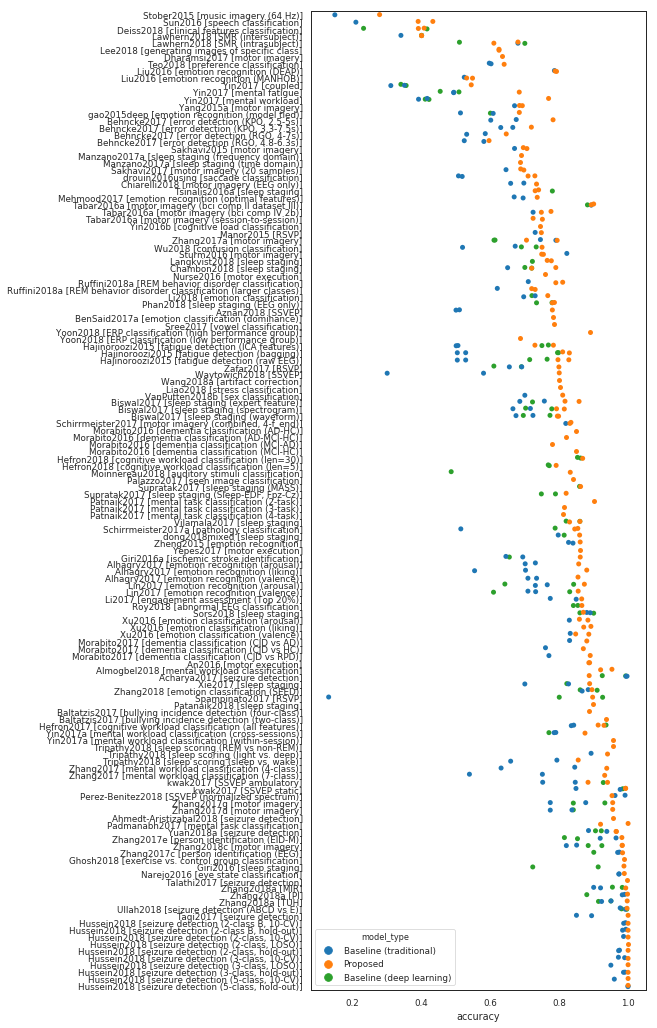

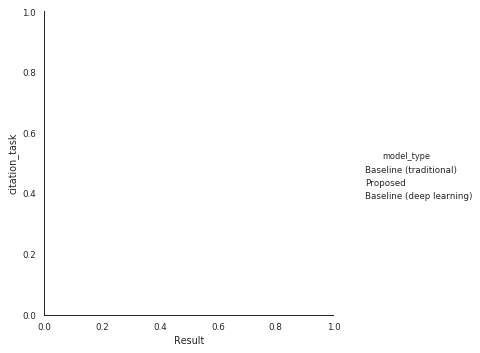

In [198]:
fig, ax = plt.subplots(figsize=(6, 18));
sns.catplot(y='citation_task', x='Result', hue='model_type', data=acc2_df, ax=ax);
ax.set_xlabel('accuracy')
ax.set_ylabel('')